# BANK REVIEW/COMPLAINT ANALYSIS USING TEXT MINING TECHNIQUE

# Identifying key themes of problems(using clustering,topic models) for bank_reviews

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import pandas_profiling
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()

from matplotlib.backends.backend_pdf import PdfPages

import statsmodels.formula.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

<Figure size 432x216 with 0 Axes>

In [2]:
import logging
from numbers import Integral

import numpy as np

from matplotlib import rcParams
from matplotlib import backends, docstring, projections
from matplotlib import __version__ as _mpl_version
from matplotlib import get_backend

import matplotlib.artist as martist
from matplotlib.artist import Artist, allow_rasterization
from matplotlib.backend_bases import FigureCanvasBase
import matplotlib.cbook as cbook
import matplotlib.colorbar as cbar
import matplotlib.image as mimage

from matplotlib.axes import Axes, SubplotBase, subplot_class_factory
from matplotlib.blocking_input import BlockingMouseInput, BlockingKeyMouseInput
from matplotlib.gridspec import GridSpec
import matplotlib.legend as mlegend
from matplotlib.patches import Rectangle
from matplotlib.projections import (get_projection_names,
                                    process_projection_requirements)
from matplotlib.text import Text, TextWithDash
from matplotlib.transforms import (Affine2D, Bbox, BboxTransformTo,
                                   TransformedBbox)
import matplotlib._layoutbox as layoutbox
from matplotlib.backend_bases import NonGuiException

In [3]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup

%matplotlib inline

In [4]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import RegexpTokenizer as regextoken
from nltk.corpus import stopwords
from nltk import FreqDist, bigrams, trigrams
from nltk import WordNetLemmatizer
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
import gensim
from gensim.models.keyedvectors import KeyedVectors
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense, Flatten, Embedding, Conv1D, MaxPooling1D, Dropout, LSTM, GRU
from keras.regularizers import l1, l2
from sklearn.metrics import classification_report
import warnings

Using TensorFlow backend.


In [5]:
import pandas as pd
import numpy as np
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph. 
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
#import warnings
#warnings.filterwarnings("ignore", category=FutureWarning)

In [6]:
#import required packages
#basics
import pandas as pd 
import numpy as np

#misc
import gc
import time
import warnings

#stats
#from scipy.misc import imread
from scipy import sparse
import scipy.stats as ss

#viz
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image
#import matplotlib_venn as venn

#nlp
import string
import re    #for regex
import nltk
from nltk.corpus import stopwords

#import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize

# Tweet tokenizer does not split at apostophes which is what we want
from nltk.tokenize import TweetTokenizer   


#FeatureEngineering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

import  textblob
#import xgboost
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

from textblob import TextBlob
from nltk.stem import PorterStemmer
import nltk
#nltk.download('wordnet')
from textblob import Word

#settings
start_time=time.time()
color = sns.color_palette()
sns.set_style("dark")
eng_stopwords = set(stopwords.words("english"))
warnings.filterwarnings("ignore")

lem = WordNetLemmatizer()
tokenizer=TweetTokenizer()

%matplotlib inline

# Data processing

In [7]:
TEXT = pd.read_excel("C:\\Users\\RAMKUMAR\\Desktop\\BankReviews.xlsx",header=0,encoding = 'unicode_escape')
TEXT

,Date,Stars,Reviews,BankName
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage
...,...,...,...,...
500,2016-02-06,1,\r\nI never write reviews but had to this time...,North American Savings Bank
501,2016-07-25,1,\r\nIt all started when Bob G ran a credit che...,North American Savings Bank
502,2017-09-27,1,\r\nWhat a horrible experience. We have excell...,North American Savings Bank
503,2017-12-24,1,"\r\nRep was extremely professional, friendly, ...",North American Savings Bank


In [8]:
#Apply TfidfVectorizer to review text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn import metrics

In [9]:
model = KMeans(n_clusters=5, init='k-means++', max_iter=100, n_init=1,random_state=5)

vectorizer = TfidfVectorizer(min_df = 0.05, max_df=0.95,
                             ngram_range=(1, 2), 
                             stop_words='english')
vectorizer.fit(TEXT['Reviews'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.95, max_features=None, min_df=0.05,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [10]:
X_train = vectorizer.transform(TEXT['Reviews'])
vocab = vectorizer.get_feature_names()
sse_err = []
res = model.fit(X_train)
vocab = np.array(vocab)
cluster_centers = np.array(res.cluster_centers_)
sorted_vals = [res.cluster_centers_[i].argsort() for i in range(0,np.shape(res.cluster_centers_)[0])]
words=set()
for i in range(len(res.cluster_centers_)):
    words = words.union(set(vocab[sorted_vals[i][-10:]]))
words=list(words)

In [11]:
#top 10 words for each cluster
words

['working',
 'entire',
 'closing',
 'called',
 'questions',
 'loan',
 'thanks',
 'got',
 'service',
 'responsive',
 'helpful',
 'credit',
 'knowledgeable',
 'highly',
 'time',
 'home',
 'amazing',
 'work',
 'best',
 'help',
 'closed',
 'worked',
 'friendly',
 'experience',
 'team',
 'professional',
 'mortgage',
 'told',
 'weeks',
 'customer',
 'rate',
 'company',
 'recommend',
 'helped',
 'process',
 'great',
 'read',
 'customer service',
 'did']

In [12]:
#add top words to train set
train_set=X_train[:,[np.argwhere(vocab==i)[0][0] for i in words]]

In [13]:
# how many observations are in each cluster
TEXT['cluster'] = model.labels_
TEXT.groupby('cluster').count()

,Date,Stars,Reviews,BankName
cluster,,,,
0,86,86,86,86
1,128,128,128,128
2,131,131,131,131
3,50,50,50,50
4,110,110,110,110


In [14]:
# what does each cluster look like
TEXT.groupby('cluster').mean()

,Stars
cluster,
0,4.674419
1,4.843750
2,4.755725
3,4.760000
4,2.381818


In [15]:
# correlation matrix
TEXT.corr()

,Stars,cluster
Stars,1.000000,-0.491083
cluster,-0.491083,1.000000


# Identifying key themes of problems(using clustering,topic models)

# Cluster_1

In [16]:
# import library necessary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
import nltk
from wordcloud import WordCloud
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import LatentDirichletAllocation

In [17]:
TEXT['Reviews'] = TEXT['Reviews'].str.replace('\n', '')
TEXT.head()

,Date,Stars,Reviews,BankName,cluster
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage,1
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage,3
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage,1
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage,1
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage,3


In [18]:
# components for features reduction
n_components = 8

In [19]:
# number of clusters we want
n_clusters = 8

In [20]:
# covert words into TFIDF metrics
tfidf = TfidfVectorizer(stop_words = 'english')
X_text = tfidf.fit_transform(TEXT['Reviews'])
X_text

<505x2430 sparse matrix of type '<class 'numpy.float64'>'
	with 14582 stored elements in Compressed Sparse Row format>

In [21]:
# reduce dimensions
svd = TruncatedSVD(n_components=n_components, random_state = 0)
X_2d = svd.fit_transform(X_text)
X_2d

array([[ 0.21149727,  0.11027612, -0.08496847, ..., -0.05068993,
         0.05256089, -0.02876577],
       [ 0.12385534,  0.07459388, -0.03989121, ..., -0.04829444,
        -0.00583722, -0.04639564],
       [ 0.16867638, -0.01332325,  0.05017504, ..., -0.00339988,
         0.07094425, -0.02300865],
       ...,
       [ 0.22428631, -0.25146908, -0.06978536, ...,  0.15079519,
        -0.06401612,  0.12524575],
       [ 0.23128299, -0.23322738, -0.01818492, ..., -0.06716124,
        -0.15342011, -0.05851862],
       [ 0.18139049, -0.21717315, -0.00280786, ...,  0.07437812,
        -0.13804869,  0.02873987]])

In [22]:
# fit k-mean clustering
kmeans = KMeans(n_clusters=n_clusters, random_state = 0)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [23]:
# predict our clusters for each song
X_clustered = kmeans.fit_predict(X_2d)
X_clustered

array([4, 0, 1, 1, 1, 1, 1, 5, 5, 5, 1, 1, 0, 1, 1, 1, 5, 5, 5, 5, 5, 5,
       6, 6, 6, 6, 5, 0, 3, 6, 3, 6, 1, 4, 4, 7, 5, 4, 1, 5, 1, 2, 5, 5,
       5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 5, 1, 1, 5, 4, 1, 1, 5, 1, 1,
       1, 1, 1, 4, 4, 1, 1, 5, 1, 1, 1, 1, 1, 4, 1, 5, 1, 1, 1, 5, 1, 5,
       1, 4, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 1, 5, 5, 5, 5, 5, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 7, 7, 4, 0, 7, 7, 1, 0, 7, 7, 7, 7, 7, 7, 4,
       1, 1, 7, 7, 4, 4, 5, 1, 1, 1, 1, 0, 1, 1, 1, 4, 5, 4, 1, 4, 1, 5,
       5, 5, 5, 5, 5, 6, 6, 6, 6, 5, 0, 3, 6, 3, 3, 6, 1, 4, 4, 7, 5, 4,
       1, 3, 5, 1, 5, 4, 6, 0, 1, 5, 4, 1, 6, 6, 5, 1, 3, 1, 1, 5, 5, 6,
       0, 1, 0, 1, 4, 1, 5, 0, 7, 4, 1, 4, 1, 1, 5, 1, 0, 0, 5, 0, 4, 5,
       1, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 0, 0,
       5, 1, 0, 1, 4, 4, 1, 1, 5, 1, 1, 4, 5, 1, 5, 1, 0, 4, 1, 1, 1, 0,
       0, 4, 4, 4, 4, 1, 0, 1, 1, 1, 1, 4, 1, 5, 1, 1, 1, 0, 1, 4, 4, 4,
       5, 5, 4, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [24]:
# display by groups
TEXT_plot = pd.DataFrame(list(X_2d), list(X_clustered))
TEXT_plot = TEXT_plot.reset_index()
TEXT_plot.rename(columns = {'index': 'Cluster'}, inplace = True)
TEXT_plot['Cluster'] = TEXT_plot['Cluster'].astype(int)
TEXT_plot['Cluster']

0      4
1      0
2      1
3      1
4      1
      ..
500    5
501    5
502    5
503    5
504    5
Name: Cluster, Length: 505, dtype: int32

In [25]:
print(TEXT_plot.head())

   Cluster         0         1         2         3         4         5  \
0        4  0.211497  0.110276 -0.084968 -0.039318  0.035916 -0.050690   
1        0  0.123855  0.074594 -0.039891  0.124137 -0.057891 -0.048294   
2        1  0.168676 -0.013323  0.050175 -0.015928 -0.069290 -0.003400   
3        1  0.156544 -0.017026  0.043219 -0.028264 -0.063515 -0.008101   
4        1  0.209933  0.014775 -0.041325 -0.023085 -0.120081 -0.044625   

          6         7  
0  0.052561 -0.028766  
1 -0.005837 -0.046396  
2  0.070944 -0.023009  
3  0.038779 -0.035801  
4 -0.009848 -0.023095  


In [26]:
print(TEXT_plot.groupby('Cluster').agg({'Cluster': 'count'}))

         Cluster
Cluster         
0             36
1            211
2              5
3             13
4             61
5            136
6             26
7             17


In [27]:
# components for features reduction
n_components = 8

# number of clusters we want
n_clusters = 8

# covert words into TFIDF metrics
tfidf = TfidfVectorizer(stop_words = 'english')
X_text = tfidf.fit_transform(TEXT['Reviews'])

# reduce dimensions
svd = TruncatedSVD(n_components=n_components, random_state = 0)
X_2d = svd.fit_transform(X_text)

# fit k-mean clustering
kmeans = KMeans(n_clusters=n_clusters, random_state = 0)

# predict our clusters for each review
X_clustered = kmeans.fit_predict(X_2d)

# display by groups
TEXT_plot = pd.DataFrame(list(X_2d), list(X_clustered))
TEXT_plot = TEXT_plot.reset_index()
TEXT_plot.rename(columns = {'index': 'Cluster'}, inplace = True)
TEXT_plot['Cluster'] = TEXT_plot['Cluster'].astype(int)

print(TEXT_plot.head())

print(TEXT_plot.groupby('Cluster').agg({'Cluster': 'count'}))

   Cluster         0         1         2         3         4         5  \
0        4  0.211497  0.110276 -0.084968 -0.039318  0.035916 -0.050690   
1        0  0.123855  0.074594 -0.039891  0.124137 -0.057891 -0.048294   
2        1  0.168676 -0.013323  0.050175 -0.015928 -0.069290 -0.003400   
3        1  0.156544 -0.017026  0.043219 -0.028264 -0.063515 -0.008101   
4        1  0.209933  0.014775 -0.041325 -0.023085 -0.120081 -0.044625   

          6         7  
0  0.052561 -0.028766  
1 -0.005837 -0.046396  
2  0.070944 -0.023009  
3  0.038779 -0.035801  
4 -0.009848 -0.023095  
         Cluster
Cluster         
0             36
1            211
2              5
3             13
4             61
5            136
6             26
7             17


Text(0.01, 0.5, 'Component n')

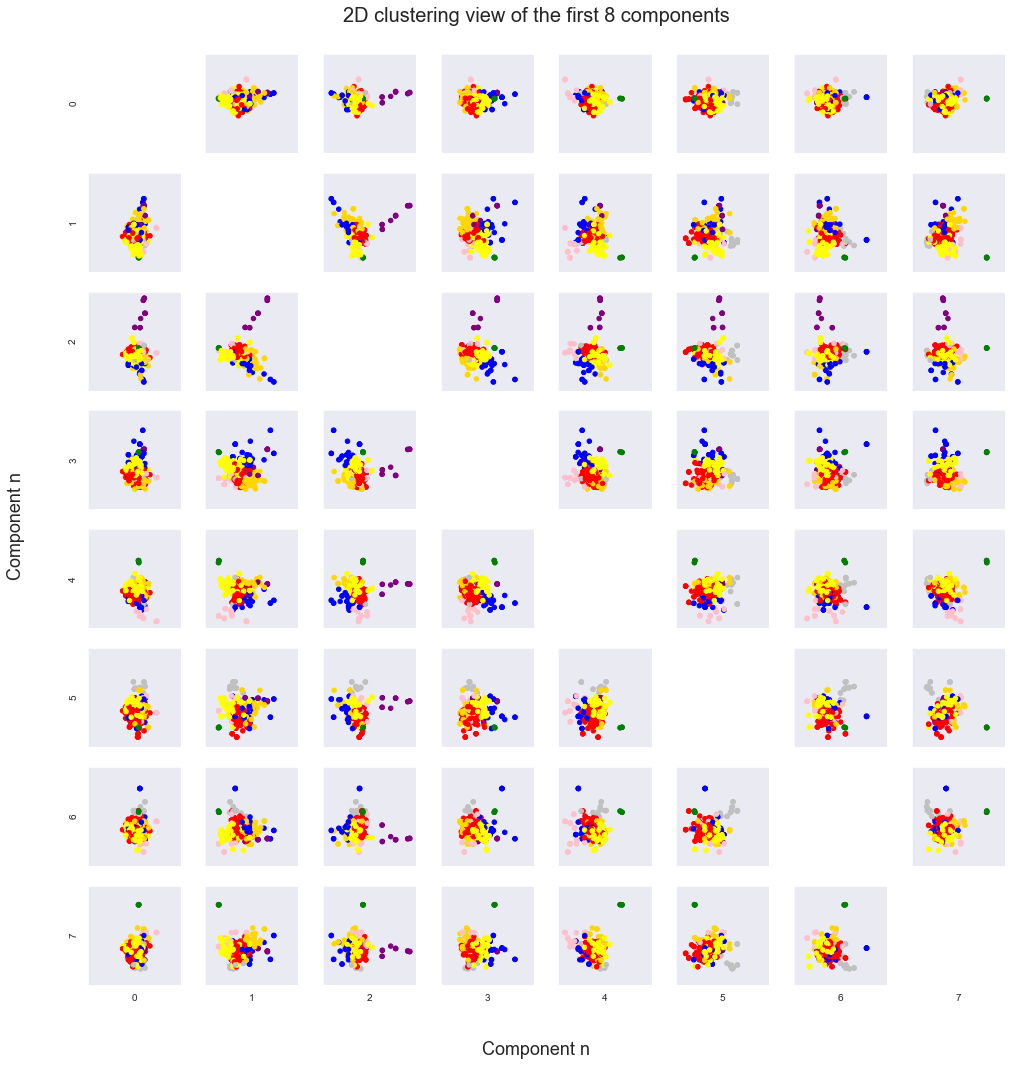

In [28]:
# make a column for color by clusters
col = TEXT_plot['Cluster'].map({0:'b', 1:'r', 2: 'g', 3:'purple', 4:'gold',5:'yellow',6:'pink',7:'silver'})

# variable for first n dimensions we want to plot
n = 8

# visualize the clusters by first n dimensions (reduced)
fig, ax = plt.subplots(n, n, sharex=True, sharey=True, figsize=(15,15))
fig.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

# plot it
k = 0
for i in range(0,n):
    for j in range(0,n):
        if i != j:
            TEXT_plot.plot(kind = 'scatter', x=j, y=i, c=col, ax = ax[i][j], fontsize = 18)
        else:
            ax[i][j].set_xlabel(i)
            ax[i][j].set_ylabel(j)
            ax[i][j].set_frame_on(False)
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])
        plt.suptitle('2D clustering view of the first {} components'.format(n), fontsize = 20)
fig.text(0.5, 0.01, 'Component n', ha='center', fontsize = 18)
fig.text(0.01, 0.5, 'Component n', va='center', rotation='vertical', fontsize = 18)

In [29]:
# Logistic Regression approach

TEXT['Cluster'] = TEXT_plot['Cluster']

# function for finding most significant words for each cluster
def generate_text(cluster):
    
    TEXT_s = TEXT['Reviews']
    y = TEXT['Cluster'].map(lambda x: 1 if x == cluster else 0)
    count = len(TEXT_s)
    
    tfidf = TfidfVectorizer(stop_words = 'english')
    X = tfidf.fit_transform(TEXT_s)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    clf = LogisticRegression(random_state = 0).fit(X_train, y_train)
    clf_d = DummyClassifier().fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    acc_d = clf_d.score(X_test, y_test)
    coef = clf.coef_.tolist()[0]
    w = tfidf.get_feature_names()
    coeff_df = pd.DataFrame({'words' : w, 'score' : coef})
    coeff_df = coeff_df.sort_values(['score', 'words'], ascending=[0, 1])
    coeff_df = coeff_df[:30]
    d = coeff_df.set_index('words')['score'].to_dict()
    return d, acc, acc_d

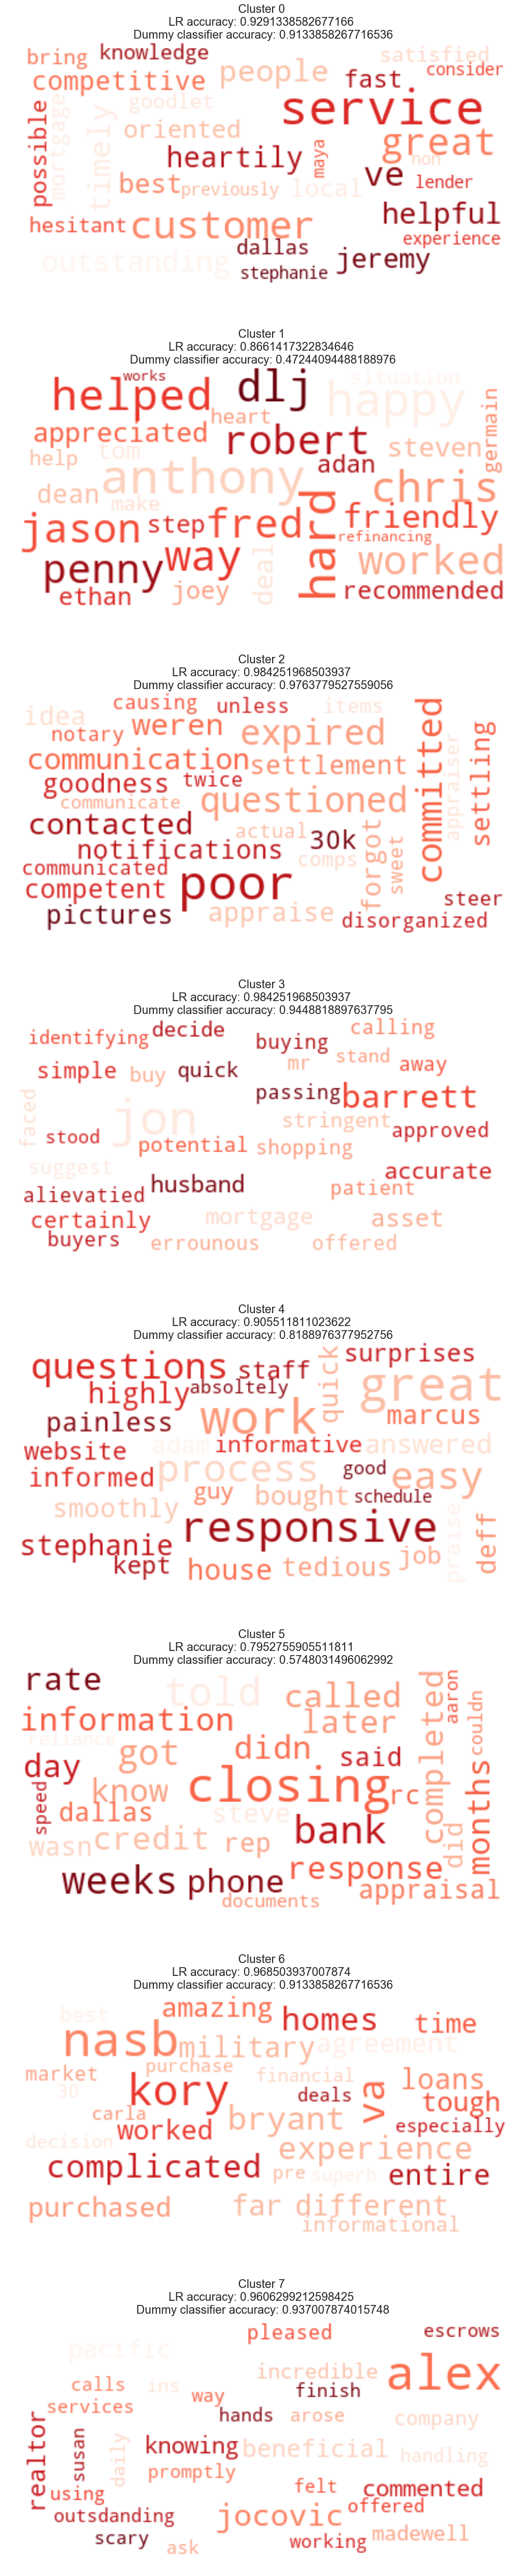

In [30]:
# visualized it by word clouds
fig, ax = plt.subplots(n_clusters, sharex=True, figsize=(15,10*n_clusters))

for i in range(0, n_clusters):
    d, acc, acc_d = generate_text(i)
    wordcloud = WordCloud(max_font_size=40, collocations=False, colormap = 'Reds', background_color = 'white').fit_words(d)
    ax[i].imshow(wordcloud, interpolation='bilinear')
    ax[i].set_title('Cluster {} \nLR accuracy: {} \nDummy classifier accuracy: {}'.format(i, acc, acc_d), fontsize = 20)
    ax[i].axis("off")

In [31]:
# LDA
no_topics = 5

c = CountVectorizer(stop_words='english')
X_text_c = c.fit_transform(TEXT['Reviews'])

lda = LatentDirichletAllocation(learning_method = 'online', n_components=no_topics, random_state=0).fit(X_text_c)
X_text_c_feature_names = c.get_feature_names()

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx))
        print (" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda, X_text_c_feature_names, no_top_words)

Topic 0:
loan process time home read recommend great work mortgage rate
Topic 1:
kirk alex appraisal lender closing did pacific loan check beneficial
Topic 2:
loan nasb closing service dallas credit payments called said mortgage
Topic 3:
process just professional closing team experience work working did chris
Topic 4:
loan poor mr recommend nasb house officer communication process rate


# CLUSTERING_2


In [32]:
# for importing dataset
import numpy as np
import pandas as pd
    
# for performing text clustering    
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# for providing the path
import os
#print(os.listdir('../input/'))

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [33]:
TEXT = pd.read_excel("C:\\Users\\RAMKUMAR\\Desktop\\BankReviews.xlsx")
TEXT

,Date,Stars,Reviews,BankName
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage
...,...,...,...,...
500,2016-02-06,1,\r\nI never write reviews but had to this time...,North American Savings Bank
501,2016-07-25,1,\r\nIt all started when Bob G ran a credit che...,North American Savings Bank
502,2017-09-27,1,\r\nWhat a horrible experience. We have excell...,North American Savings Bank
503,2017-12-24,1,"\r\nRep was extremely professional, friendly, ...",North American Savings Bank


In [34]:
TEXT['Reviews'] = TEXT['Reviews'].str.replace('\n', '')
TEXT.head()

,Date,Stars,Reviews,BankName
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage


In [35]:
# getting the shape
TEXT.shape

(505, 4)

In [36]:
# getting the length of the text as another feature

TEXT['Length'] = TEXT['Reviews'].apply(len)

In [37]:
# describing the dataset

TEXT.groupby('Length').describe().head(20)

Stars                                   
       count mean  std  min  25%  50%  75%  max
Length                                         
13       1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0
32       2.0  5.0  0.0  5.0  5.0  5.0  5.0  5.0
33       2.0  5.0  0.0  5.0  5.0  5.0  5.0  5.0
38       1.0  5.0  NaN  5.0  5.0  5.0  5.0  5.0
41       1.0  5.0  NaN  5.0  5.0  5.0  5.0  5.0
42       2.0  5.0  0.0  5.0  5.0  5.0  5.0  5.0
43       1.0  5.0  NaN  5.0  5.0  5.0  5.0  5.0
44       1.0  5.0  NaN  5.0  5.0  5.0  5.0  5.0
47       2.0  5.0  0.0  5.0  5.0  5.0  5.0  5.0
48       1.0  5.0  NaN  5.0  5.0  5.0  5.0  5.0
50       4.0  5.0  0.0  5.0  5.0  5.0  5.0  5.0
52       1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0
55       1.0  5.0  NaN  5.0  5.0  5.0  5.0  5.0
57       1.0  5.0  NaN  5.0  5.0  5.0  5.0  5.0
65       3.0  5.0  0.0  5.0  5.0  5.0  5.0  5.0
66       1.0  5.0  NaN  5.0  5.0  5.0  5.0  5.0
67       1.0  5.0  NaN  5.0  5.0  5.0  5.0  5.0
69       1.0  5.0  NaN  5.0  5.0  5.0  5.0  5.0
70       1.0  5.0  NaN  5.0  5.0  5.0  5.0  5.0
77       1.0  5.0  NaN  5.0  5.0  5.0  5.0  5.0

In [38]:
# looking at the head of the data

TEXT.head()

,Date,Stars,Reviews,BankName,Length
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage,126
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage,159
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage,462
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage,605
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage,341


# Data Visualization¶

Text(0.5, 1.0, 'The Distribution of Length over the Texts')

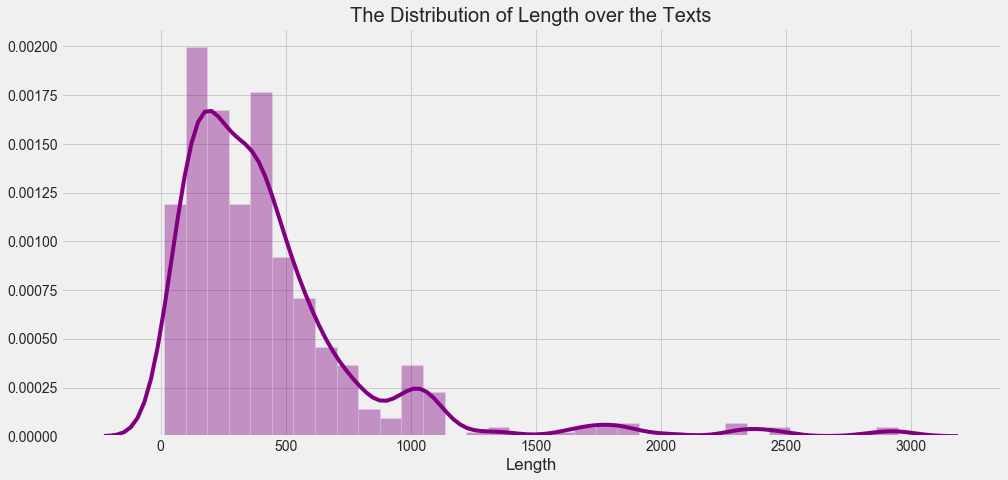

In [39]:
# looking at the distribution of length of the different texts

plt.rcParams['figure.figsize'] = (15, 7)
sns.distplot(TEXT['Length'], color = 'purple')
plt.title('The Distribution of Length over the Texts', fontsize = 20)


Text(0.5, 1.0, 'WordCloud ')

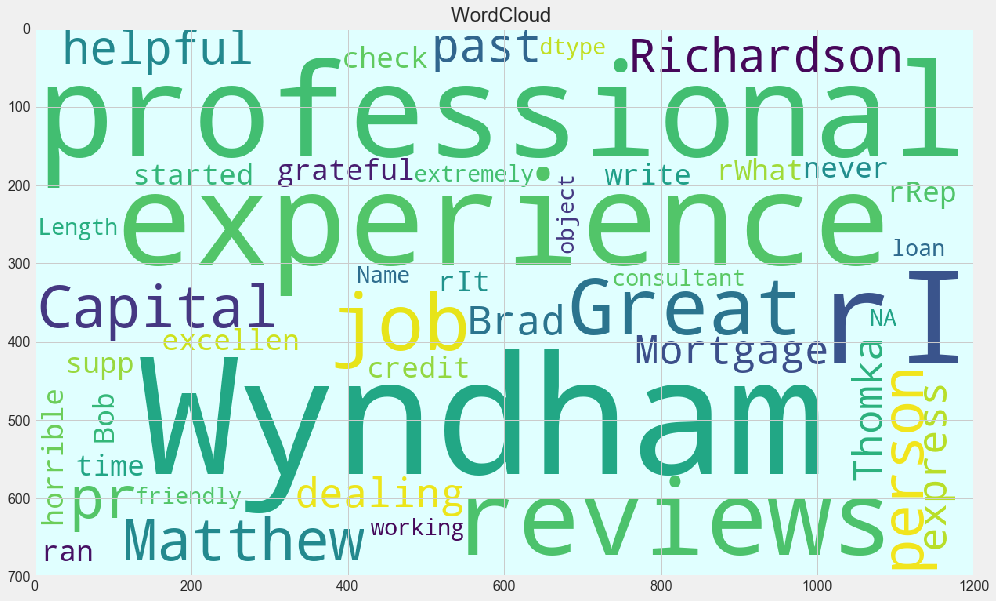

In [40]:
# wordcloud

from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'lightcyan',
                      width = 1200,
                      height = 700).generate(str(TEXT['Reviews']))

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.title("WordCloud ", fontsize = 20)

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

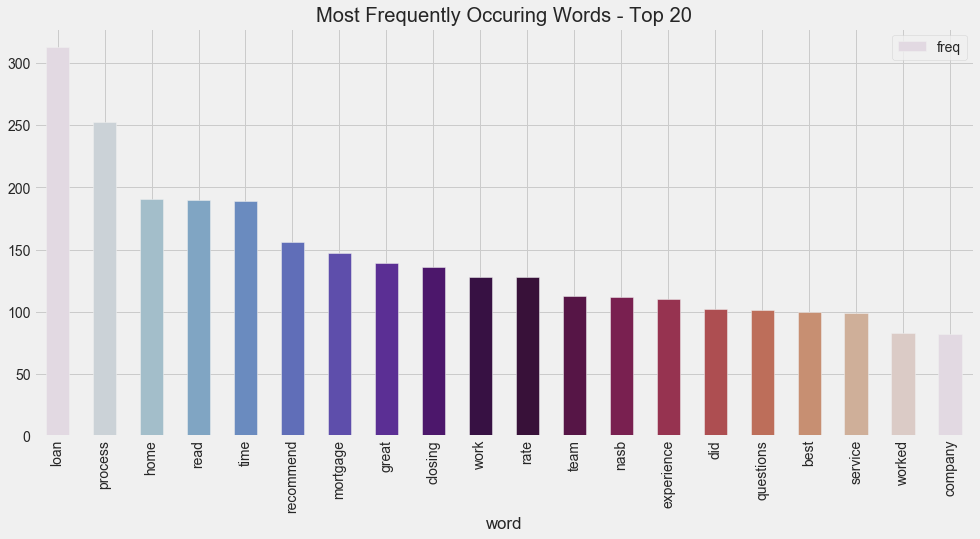

In [41]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(TEXT['Reviews'])
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.twilight(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20")

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

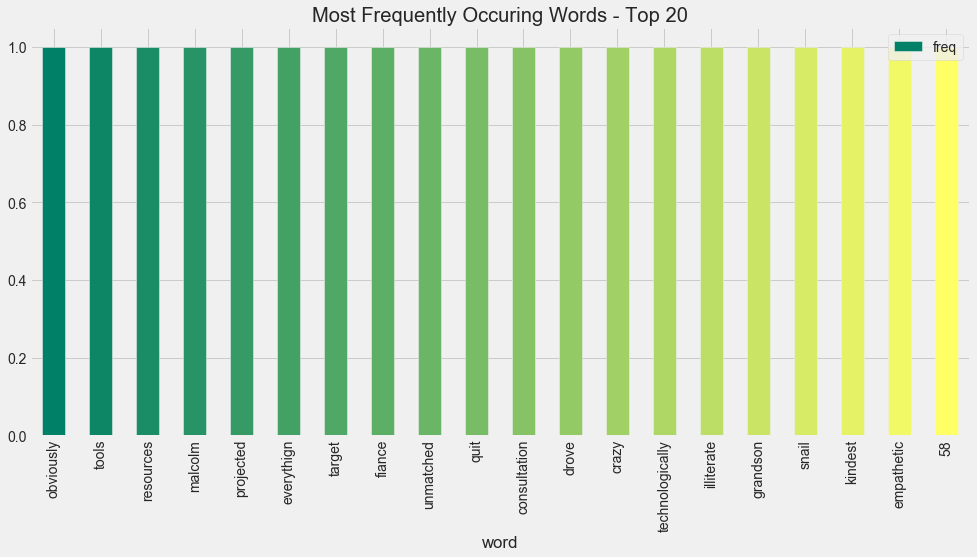

In [42]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(TEXT['Reviews'])
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.summer(np.linspace(0, 1, 20))
frequency.tail(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20")

# Data Preprocessing

In [43]:
# cleaning the texts
# importing the libraries for Natural Language Processing

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RAMKUMAR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:
# cleaning the data

corpus = []

for i in range(0, 200):
    review = re.sub('[^a-zA-Z]', ' ', TEXT['Reviews'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [45]:
# vectorizing the data using Tfidf Vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features = 2000)
X = vectorizer.fit_transform(TEXT['Reviews'])

# getting the shape of X
print("Shape of X :", X.shape)

Shape of X : (505, 2000)


# Clustering

In [46]:
true_k = 8
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=8, n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [47]:
print("Top terms per cluster:")

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")

Top terms per cluster:
Cluster 0:
 helpful
 able
 service
 customer
 rob
 end
 tim
 industry
 profession
 closed
Cluster 1:
 closing
 did
 job
 cost
 mortgage
 loan
 looking
 amazing
 guys
 close
Cluster 2:
 rate
 guaranteed
 best
 process
 oriented
 rick
 hard
 bad
 customer
 highly
Cluster 3:
 jon
 thanks
 barrett
 home
 process
 mortgage
 amazing
 experience
 purchase
 patient
Cluster 4:
 work
 great
 easy
 questions
 pleasure
 quick
 answered
 process
 thank
 alex
Cluster 5:
 loan
 home
 chris
 process
 officer
 way
 helped
 time
 recommend
 triumph
Cluster 6:
 loan
 process
 service
 nasb
 mortgage
 time
 worked
 recommend
 responsive
 team
Cluster 7:
 work
 great
 friendly
 kept
 informed
 process
 bank
 staff
 got
 responsive


Prediction


In [48]:
# prediction on the Text no. 1
Y = vectorizer.transform(TEXT['Reviews'])
Y

<505x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 14152 stored elements in Compressed Sparse Row format>

In [49]:
prediction = model.predict(Y)
print("Cluster number :", prediction)

Cluster number : [4 6 6 6 6 5 6 4 7 4 5 5 4 6 6 1 7 6 5 5 7 7 6 6 6 6 4 6 3 3 3 6 2 4 6 6 0
 4 6 6 3 5 6 7 3 6 5 1 3 1 6 7 6 7 6 4 4 4 7 1 6 0 7 4 6 6 6 5 7 7 6 0 7 4
 6 6 6 5 7 7 7 5 5 5 5 6 6 7 6 4 1 5 1 2 4 6 5 7 6 6 6 5 5 5 1 2 7 6 6 6 1
 1 1 3 6 2 4 3 3 4 6 5 5 7 6 4 4 7 4 1 1 4 6 6 6 6 6 6 3 6 6 7 5 7 7 7 4 4
 2 4 5 4 6 2 2 3 2 6 6 6 6 6 6 4 6 3 3 3 3 6 2 4 6 6 0 4 6 3 6 6 7 4 6 6 7
 5 7 3 6 6 1 0 3 7 5 2 6 6 6 2 0 6 7 5 7 4 4 7 2 7 6 4 4 6 6 6 7 2 6 6 3 5
 5 6 2 7 6 3 5 5 6 3 1 6 1 3 2 6 4 1 0 0 4 5 6 1 4 4 7 5 5 6 4 4 5 4 1 6 6
 4 5 1 4 7 5 7 4 4 7 1 0 5 5 5 5 5 1 6 7 5 5 6 7 4 7 6 5 5 1 5 6 6 4 5 5 5
 5 4 4 5 6 6 6 6 6 6 7 6 7 5 7 6 2 4 6 6 6 5 6 6 6 6 6 6 6 6 6 5 5 6 7 7 0
 7 4 4 6 6 7 6 6 6 5 4 1 1 2 5 4 0 5 6 5 0 6 5 6 3 2 4 2 2 0 0 5 2 2 4 4 0
 6 2 6 2 2 2 5 5 5 4 5 6 5 0 6 5 6 3 2 4 4 0 6 2 6 1 2 5 5 6 6 2 6 2 6 1 6
 5 6 1 4 1 0 2 6 2 6 6 6 7 5 6 6 6 6 4 6 3 3 3 3 6 2 4 6 6 0 4 6 3 6 6 7 4
 6 6 7 5 7 3 6 6 1 0 3 7 5 2 6 6 6 2 0 6 7 5 7 4 4 7 2 7 6 4 4 6 6 6 7 2 6
 7 6 3 3

# TF-IDF

TFIDF is an information retrieval technique that weighs a term’s frequency (TF) and its inverse document frequency (IDF). 

Each word has its respective TF and IDF score. The product of the TF and IDF scores of a word is called the TFIDF weight of that word.

Put simply, the higher the TFIDF score (weight), the rarer the word and vice versa.



In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf.fit(TEXT['Reviews'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [51]:
X = tfidf.transform(TEXT['Reviews'])

In [52]:
TEXT['Reviews'][1]

'Matthew Richardson is professional and helpful. He helped us find the correct product for our mortgage. Thank you very much for the excellent service, Matthew!'

# In reference to the above sentence, we can check out tf-idf scores for a few words.

In [53]:
print([X[1, tfidf.vocabulary_['product']]])

[0.2378702160637984]


In [54]:
print([X[1, tfidf.vocabulary_['service']]])

[0.13543204180404256]


In [55]:
print([X[1, tfidf.vocabulary_['excellent']]])

[0.19011526781720386]


Among these three words, "product", "service" and "excellent", tf-idf gives the highest weight to "product". 

This indicates that "product" is a much rarer word than "service" and "excellent". 

This is how to use the tf-idf to indicate the importance of words or terms inside a collection of documents.

# Text Classification

To classify sentiment, we remove neutral score 3, 

then group score 4 and 5 to positive (1), and score 1 and 2 to negative (0).

In [56]:
import numpy as np

TEXT.dropna(inplace=True)
TEXT[TEXT['Stars'] != 3]
TEXT['Positivity'] = np.where(TEXT['Stars'] > 3, 1, 0)
cols = ['Date','Stars','BankName']
TEXT.drop(cols, axis=1, inplace=True)
TEXT.head()

,Reviews,Length,Positivity
0,"Great job, Wyndham Capital! Each person was pr...",126,1
1,Matthew Richardson is professional and helpful...,159,1
2,We had a past experience with Wyndham Mortgage...,462,1
3,We have been dealing with Brad Thomka from the...,605,1
4,I can't express how grateful I am for the supp...,341,1


In [57]:
TEXT.groupby('Positivity').size()

Positivity
0     95
1    410
dtype: int64

# Train test split¶

In [58]:
X = TEXT.Reviews
y = TEXT.Positivity

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [60]:
print("Train set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(X_train),
                                                                             (len(X_train[y_train == 0]) / (len(X_train)*1.))*100,
                                                                            (len(X_train[y_train == 1]) / (len(X_train)*1.))*100))

Train set has total 378 entries with 16.14% negative, 83.86% positive


In [61]:
print("Test set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(X_test),
                                                                             (len(X_test[y_test == 0]) / (len(X_test)*1.))*100,
                                                                            (len(X_test[y_test == 1]) / (len(X_test)*1.))*100))

Test set has total 127 entries with 26.77% negative, 73.23% positive


In [62]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [63]:
def accuracy_summary(pipeline, X_train, y_train, X_test, y_test):
    sentiment_fit = pipeline.fit(X_train, y_train)
    y_pred = sentiment_fit.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    return accuracy

In [64]:
cv = CountVectorizer()
rf = RandomForestClassifier(class_weight="balanced")
n_features = np.arange(10000,30001,10000)

def nfeature_accuracy_checker(vectorizer=cv, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=rf):
    result = []
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Test result for {} features".format(n))
        nfeature_accuracy = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,nfeature_accuracy))
    return result

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [66]:
print("Result for trigram with stop words (Tfidf)\n")
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 3))

Result for trigram with stop words (Tfidf)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)


Test result for 10000 features
accuracy score: 86.61%
Test result for 20000 features
accuracy score: 86.61%
Test result for 30000 features
accuracy score: 86.61%


# Before we are done here, we should check the classification report.

In [67]:
from sklearn.metrics import classification_report

cv = CountVectorizer(max_features=30000,ngram_range=(1, 3))
pipeline = Pipeline([
        ('vectorizer', cv),
        ('classifier', rf)
    ])
sentiment_fit = pipeline.fit(X_train, y_train)
y_pred = sentiment_fit.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['negative','positive']))

              precision    recall  f1-score   support

    negative       0.94      0.44      0.60        34
    positive       0.83      0.99      0.90        93

   micro avg       0.84      0.84      0.84       127
   macro avg       0.88      0.72      0.75       127
weighted avg       0.86      0.84      0.82       127



# Chi2 Feature Selection


In [68]:
from sklearn.feature_selection import chi2

tfidf = TfidfVectorizer(max_features=30000,ngram_range=(1, 3))
X_tfidf = tfidf.fit_transform(TEXT.Reviews)
y = TEXT.Positivity
chi2score = chi2(X_tfidf, y)[0]

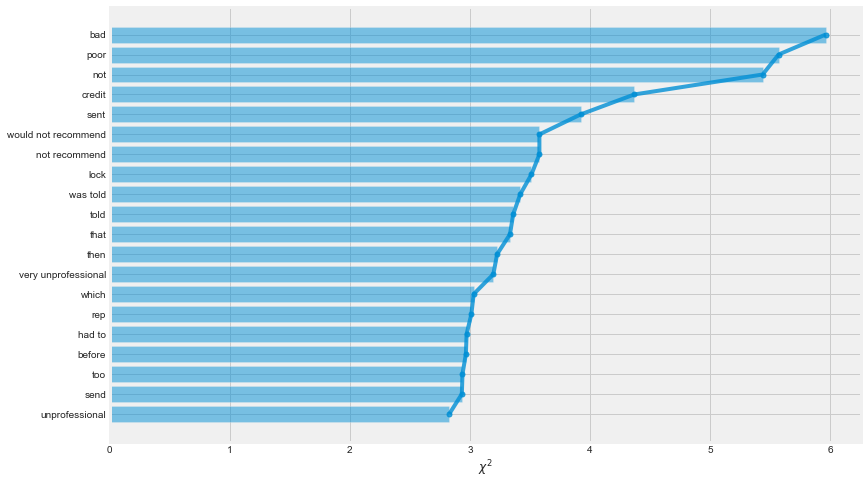

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
scores = list(zip(tfidf.get_feature_names(), chi2score))
chi2 = sorted(scores, key=lambda x:x[1])
topchi2 = list(zip(*chi2[-20:]))
x = range(len(topchi2[1]))
labels = topchi2[0]
plt.barh(x,topchi2[1], align='center', alpha=0.5)
plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
plt.yticks(x, labels)
plt.xlabel('$\chi^2$')
plt.show();

# Topic modeling

Topic modeling is a type of statistical modeling for discovering the abstract “topics” that occur in a collection of documents.

Latent Dirichlet Allocation (LDA) is an example of topic model and is used to classify text in a document to a particular topic. 

It builds a topic per document model and words per topic model, modeled as Dirichlet distributions.

Here we are going to apply LDA to a set of documents and split them into topics.

In [70]:
import pandas as pd
TEXT = pd.read_excel("C:\\Users\\RAMKUMAR\\Desktop\\BankReviews.xlsx",error_bad_lines=False)
TEXT
data_text = TEXT[['Reviews']]
data_text['index'] = data_text.index
documents = data_text

# Data Pre-processing

We will perform the following steps:

Tokenization: Split the text into sentences and the sentences into words. Lowercase the words and remove punctuation.

Words that have fewer than 3 characters are removed.

All stopwords are removed.

Words are lemmatized — words in third person are changed to first person and verbs in past and future tenses are changed into present.

Words are stemmed — words are reduced to their root form.

Loading gensim and nltk libraries



In [71]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\RAMKUMAR\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# A function to perform lemmatize and stem preprocessing steps on the data set.


In [72]:
def lemmatize_stemming(text):
    return nltk.stem.WordNetLemmatizer().lemmatize(text, pos='v')
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

# Select a document to preview after preprocessing.

In [73]:
doc_sample = documents[documents['index'] == 504].values[0][0]
print('TEXT: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

TEXT: 
['\r\nI', 'was', 'working', 'with', 'a', 'loan', 'consultant', 'from', 'NASB', 'and', 'she', 'told', 'me', 'that', 'she', 'would', 'give', 'me', 'a', 'rate', 'of', '4.875%', 'for', 'a', '30', 'year', 'fixed', 'loan', 'with', 'a', 'total', 'closing', 'cost', 'of', '$2300.', 'I', 'asked', 'her', 'to', 'send', 'me', 'the', 'good', 'faith', 'estimate.', 'The', 'good', 'faith', 'estimate', 'came', 'with', 'a', 'total', 'closing', 'cost', 'of', '$2929', 'which', 'is', 'about', '$600', 'more', 'than', 'she', 'mentioned', 'during', 'our', 'conversation.', 'When', 'I', 'called', 'her', 'for', 'explanation', 'of', 'the', 'extra', '$600', 'she', 'said', 'that', 'there', 'is', 'a', 'state', 'tax', '545.10', 'which', 'she', 'was', 'not', 'aware', 'of.', 'What', 'an', 'explanation!!!!', 'She', 'knew', 'my', 'state', 'from', 'the', 'beginning', 'and', 'I', 'repeatedly', 'asked', 'her', 'for', 'a', "'TOTAL'", 'closing', 'cost', 'and', 'that', 'time', 'she', 'repeatedly', 'said', 'it', 'will', '

# Preprocess the headline text, saving the results as ‘processed_docs’¶

In [74]:
processed_docs = TEXT['Reviews'].map(preprocess)
processed_docs[:10]

0    [great, wyndham, capital, person, professional...
1    [matthew, richardson, professional, helpful, h...
2    [past, experience, wyndham, mortgage, question...
3    [deal, brad, thomka, begin, start, stressful, ...
4    [express, grateful, support, zach, provide, fa...
5    [pleasure, work, wyndham, capital, september, ...
6    [experience, mattison, greatly, professionally...
7    [patrick, answer, question, email, immediately...
8    [love, work, group, people, laugh, phone, answ...
9    [great, interface, loan, application, document...
Name: Reviews, dtype: object

# Bag of Words on the Data set
Create a dictionary from ‘processed_docs’ containing the number of times a word appears in the training set.

In [75]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 capital
1 great
2 help
3 person
4 process
5 professional
6 refinance
7 smoothly
8 thank
9 wyndham
10 correct


# Gensim filter_extremes

Filter out tokens that appear in

less than 15 documents (absolute number) or

more than 0.5 documents (fraction of total corpus size, not absolute number).

After the above two steps, keep only the first 100000 most frequent tokens.

In [76]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

# Gensim doc2bow

For each document we create a dictionary reporting how many words and how many times those words appear. 
Save this to ‘bow_corpus’, then check our selected document earlier.

In [77]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[504]

[(12, 1),
 (15, 4),
 (23, 2),
 (28, 1),
 (36, 1),
 (38, 4),
 (39, 1),
 (53, 1),
 (65, 1),
 (67, 1),
 (82, 3),
 (92, 2),
 (93, 1),
 (94, 1),
 (96, 1),
 (97, 1),
 (100, 1),
 (102, 2),
 (105, 2),
 (115, 2),
 (116, 1),
 (122, 2),
 (127, 3),
 (141, 1),
 (162, 1),
 (169, 1)]

# Preview Bag Of Words for our sample preprocessed document.

In [78]:
bow_doc_504 = bow_corpus[504]
for i in range(len(bow_doc_504)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_504[i][0], 
                                               dictionary[bow_doc_504[i][0]], 
bow_doc_504[i][1]))

Word 12 ("extra") appears 1 time.
Word 15 ("loan") appears 4 time.
Word 23 ("begin") appears 2 time.
Word 28 ("time") appears 1 time.
Word 36 ("work") appears 1 time.
Word 38 ("close") appears 4 time.
Word 39 ("communication") appears 1 time.
Word 53 ("later") appears 1 time.
Word 65 ("tell") appears 1 time.
Word 67 ("call") appears 1 time.
Word 82 ("know") appears 3 time.
Word 92 ("say") appears 2 time.
Word 93 ("bank") appears 1 time.
Word 94 ("rate") appears 1 time.
Word 96 ("different") appears 1 time.
Word 97 ("like") appears 1 time.
Word 100 ("send") appears 1 time.
Word 102 ("good") appears 2 time.
Word 105 ("ask") appears 2 time.
Word 115 ("nasb") appears 2 time.
Word 116 ("fee") appears 1 time.
Word 122 ("come") appears 2 time.
Word 127 ("cost") appears 3 time.
Word 141 ("receive") appears 1 time.
Word 162 ("read") appears 1 time.
Word 169 ("expect") appears 1 time.


# TF-IDF

Create tf-idf model object using models.
TfidfModel on ‘bow_corpus’ and save it to ‘tfidf’, then apply transformation to the entire corpus and call it ‘corpus_tfidf’. 
Finally we preview TF-IDF scores for our first document.

In [79]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.3658896514392935),
 (1, 0.4650823399832199),
 (2, 0.23153098404723194),
 (3, 0.49220925613324934),
 (4, 0.44652725076007543),
 (5, 0.3931412544326623)]


# Running LDA using Bag of Words

Train our lda model using gensim.models.LdaMulticore and save it to ‘lda_model’

In [80]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

W1219 19:26:38.249048 10448 ldamulticore.py:248] too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy


# For each topic, we will explore the words occuring in that topic and its relative weight.

In [81]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.044*"alex" + 0.044*"work" + 0.032*"loan" + 0.029*"process" + 0.027*"responsive" + 0.024*"read" + 0.023*"company" + 0.021*"go" + 0.018*"pacific" + 0.017*"close"
Topic: 1 
Words: 0.038*"question" + 0.036*"refinance" + 0.030*"rate" + 0.030*"want" + 0.023*"say" + 0.021*"house" + 0.020*"process" + 0.019*"loan" + 0.019*"thank" + 0.019*"happy"
Topic: 2 
Words: 0.055*"work" + 0.046*"helpful" + 0.044*"time" + 0.036*"help" + 0.033*"process" + 0.027*"better" + 0.026*"home" + 0.026*"appreciate" + 0.025*"rate" + 0.024*"great"
Topic: 3 
Words: 0.048*"loan" + 0.046*"time" + 0.045*"work" + 0.037*"recommend" + 0.032*"close" + 0.023*"process" + 0.021*"read" + 0.019*"highly" + 0.018*"team" + 0.017*"great"
Topic: 4 
Words: 0.097*"close" + 0.028*"loan" + 0.026*"send" + 0.022*"mortgage" + 0.021*"check" + 0.020*"nasb" + 0.020*"read" + 0.020*"tell" + 0.019*"work" + 0.019*"rate"
Topic: 5 
Words: 0.063*"process" + 0.041*"great" + 0.040*"work" + 0.028*"loan" + 0.027*"close" + 0.027*"experience

# Running LDA using TF-IDF¶

In [82]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

W1219 19:26:42.256592 10448 ldamulticore.py:248] too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy


Topic: 0 Word: 0.023*"weeks" + 0.023*"home" + 0.021*"purchase" + 0.020*"close" + 0.020*"great" + 0.019*"company" + 0.017*"help" + 0.016*"recommend" + 0.016*"mortgage" + 0.016*"alex"
Topic: 1 Word: 0.023*"family" + 0.019*"nasb" + 0.019*"excellent" + 0.019*"loan" + 0.019*"alex" + 0.018*"definitely" + 0.018*"process" + 0.018*"friends" + 0.018*"home" + 0.018*"team"
Topic: 2 Word: 0.031*"professional" + 0.026*"timely" + 0.025*"help" + 0.024*"helpful" + 0.023*"quick" + 0.022*"great" + 0.021*"able" + 0.021*"adam" + 0.020*"process" + 0.019*"appreciate"
Topic: 3 Word: 0.022*"nasb" + 0.019*"work" + 0.018*"time" + 0.018*"loan" + 0.018*"experience" + 0.017*"close" + 0.017*"team" + 0.016*"want" + 0.016*"extremely" + 0.016*"great"
Topic: 4 Word: 0.030*"phone" + 0.024*"customer" + 0.024*"responsive" + 0.023*"service" + 0.022*"great" + 0.022*"say" + 0.019*"helpful" + 0.019*"send" + 0.019*"reliance" + 0.018*"lender"
Topic: 5 Word: 0.023*"amaze" + 0.021*"couldn" + 0.020*"home" + 0.020*"process" + 0.018*

# Testing model on unseen document

In [83]:
unseen_document = 'How a Pentagon deal became an identity crisis for Google'
bow_vector = dictionary.doc2bow(preprocess(unseen_document))
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.5499082803726196	 Topic: 0.038*"question" + 0.036*"refinance" + 0.030*"rate" + 0.030*"want" + 0.023*"say"
Score: 0.050021231174468994	 Topic: 0.052*"home" + 0.040*"loan" + 0.039*"process" + 0.031*"time" + 0.026*"work"
Score: 0.050019506365060806	 Topic: 0.033*"adam" + 0.030*"rate" + 0.028*"question" + 0.028*"process" + 0.027*"read"
Score: 0.050018999725580215	 Topic: 0.048*"loan" + 0.046*"time" + 0.045*"work" + 0.037*"recommend" + 0.032*"close"
Score: 0.05001237243413925	 Topic: 0.055*"work" + 0.046*"helpful" + 0.044*"time" + 0.036*"help" + 0.033*"process"
Score: 0.05001192167401314	 Topic: 0.052*"loan" + 0.034*"nasb" + 0.032*"email" + 0.025*"call" + 0.021*"service"
Score: 0.05000460892915726	 Topic: 0.063*"process" + 0.041*"great" + 0.040*"work" + 0.028*"loan" + 0.027*"close"
Score: 0.05000167340040207	 Topic: 0.097*"close" + 0.028*"loan" + 0.026*"send" + 0.022*"mortgage" + 0.021*"check"
Score: 0.05000070482492447	 Topic: 0.069*"work" + 0.032*"step" + 0.029*"help" + 0.029*"kn